# Wine Quality Analysis 

Analysis of portuguese white and red wine samples based on chemical characteristics and quality rating.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Read csv
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

In [ ]:
# Explore data
df_red.info()
df_white.info()

df_red.head()

# Assessing data 
Check for missing, duplicate values and gain general sense of data values

In [ ]:
# Samples in each dataset
print(df_red.shape)
print(df_white.shape)

In [ ]:
# Missing values
print('Columns with missing values in red wine data: ')
red_missing = df_red.columns[df_red.isnull().any()]
print(red_missing)

print('Columns with missing values in white wine data: ')
white_missing = df_white.columns[df_white.isnull().any()]
print(white_missing)

No missing data values present in the dataset

## Duplicate Values
Check for duplicate values and explore specific rows to ensure safe deletion of duplicates

In [ ]:
# Duplicate rows
duplicate_red = df_red[df_red.duplicated(keep=False)]
duplicate_white = df_white[df_white.duplicated(keep=False)]

# Uncomment to explore duplicate rows
#print(duplicate_red)
#print(duplicate_white)

In [ ]:
# Drop duplicates
df_red.drop_duplicates()
df_white.drop_duplicates()

df_white.duplicated().sum()

In [ ]:
# Unique values for columns
df_red['quality'].nunique()
df_white['quality'].nunique()

# Combine red and white wine datasets
Create color columns for each dataset and combine into one 

In [ ]:
# Create color column
color_red = np.repeat('red', df_red.shape[0]) 
color_white = np.repeat('white', df_white.shape[0])

In [ ]:
# Append columns to each dataset
df_red['color'] = color_red
df_white['color'] = color_white

# Combine df
df_wine = df_white.append(df_red)
#df_wine.info()
#df_wine.head()

# Create visuals to explore data

In [ ]:
# Create edited csv
df_wine.to_csv('wine_data_edited.csv')

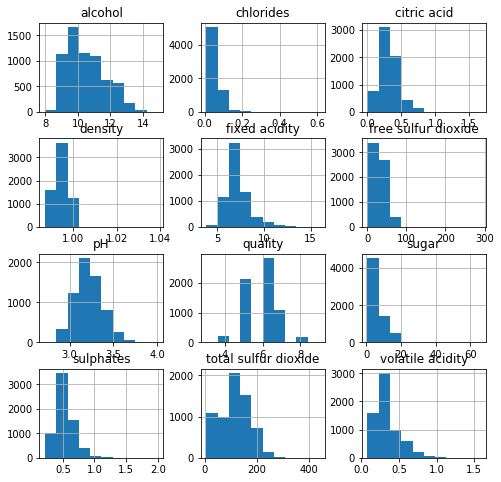

In [193]:
# Histograms of various features
df_wine.hist(figsize=(8,8));

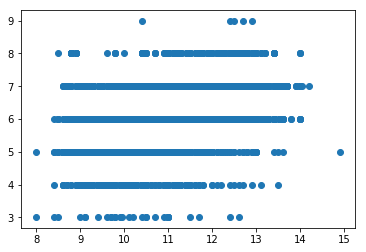

In [194]:
# Scatter plots of features against quality
plt.scatter(x=df_wine['alcohol'], y=df_wine['quality'])
plt.show()

# Exploration of Trends
## Average stars for different type of wines and pH levels

In [ ]:
# Mean quality of each wine type
df_wine.groupby(by='color').mean()

In [ ]:
# Extract min, percentiles, max for pH as bin edges
bin_edges = df_wine['pH'].describe()[3:8]
bin_names = ['High', 'Moderately High', 'Medium','Low']

In [ ]:
# Creates acidity_levels column
df_wine['acidity_levels'] = pd.cut(df_wine['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_wine.head()

In [ ]:
# Check mean ratings for different pH levels
ph_mean_ratings = df_wine.groupby(by='acidity_levels')['quality'].mean()

# Do wines with higher alcohol content have better ratings? 

In [ ]:
# Create groups based on alcohol levels
df_low_alc= df_wine.query("alcohol <= alcohol.median()")
df_high_alc = df_wine.query("alcohol > alcohol.median()")

In [ ]:
# Check whether ratings is affected by alcohol levels
low_alc_quality = df_low_alc['quality'].mean()
high_alc_quality = df_high_alc['quality'].mean()

Wine with higher alcohol content has higher quality ratings. 

# Do sweeter wines get better ratings? 

In [ ]:
# rename column name
df_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)

# Create groups based on residual sugar levels
df_low_sugar = df_wine.query('sugar <= sugar.median()')
df_high_sugar = df_wine.query('sugar > sugar.median()')

In [ ]:
# Check whether ratings is affected by sugar levels
low_sugar_rating = df_low_sugar['quality'].mean()
high_sugar_rating = df_high_sugar['quality'].mean()

# Data Visualization
## 1: Do wines with higher alcoholic content receive better ratings?

In [ ]:
# Create a bar chart
locations = [1,2]
heights = [low_alc_quality, high_alc_quality]
labels = ['low', 'high']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Rating by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating')

## 2: Do sweeter wines receive higher ratings? 

In [ ]:
# Create a bar chart
locations = [1,2]
heights = [low_sugar_rating, high_sugar_rating]
labels = ['low', 'high']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Rating by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating')

## 3: What level of acidity receives the highest average rating? 

In [ ]:
locations = [1,2,3,4]
heights = ph_mean_ratings
labels = bin_names
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Rating by pH Levels')
plt.xlabel('pH Levels')
plt.ylabel('Average Quality Rating')

In [ ]:
#plt.scatter(df_wine['pH'], df_wine['quality'])
plt.plot(df_wine['pH'], df_wine['quality'])